
recotwix comprises a set of utilities for reconstructing MR images from Siemens rawdata files (.dat).
The goal is to offer distinct Python scripts (classes) for reconstructing various sequence types. These classes inherit from 'recotwix', the parent class, which furnishes fundamental reconstruction routines and several general utilities.

### Requirments

recotwix uses [twixtools](https://github.com/pehses/twixtools) for raw data reading purposes. It has undergone testing and validation with Python 3.10.
Other packages needed:
 - numpy 
 - torch 
 - scipy
 - nibabel 
 - tqdm
 
recotwix also employs [BART](https://github.com/mrirecon/bart) for coil sensitivity calculation and combination. 

###  Installation
open terminal and simply navigate to the recotwix and install it with pip:

    pip install .

### Demo
The provided examples showcase the reconstruction of a B0 map derived from a double-echo GRE sequence and a B1+ map from a [ 3D satTFL](https://doi.org/10.1002/mrm.29459) sequence.

Software version: VD/VE (!?)

Scan  0


100%|██████████| 949M/949M [00:01<00:00, 902MB/s] 


Extracting kspace...
kspace original shape : torch.Size([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 80, 1, 1, 110, 32, 108]), scantype: image
kspace corrected shape: torch.Size([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 80, 1, 1, 110, 32, 110]), scantype: image


k-space to image: 100%|██████████| 32/32 [00:00<00:00, 147.89it/s]


Calculating B0 map. ΔTE = 3500 μs


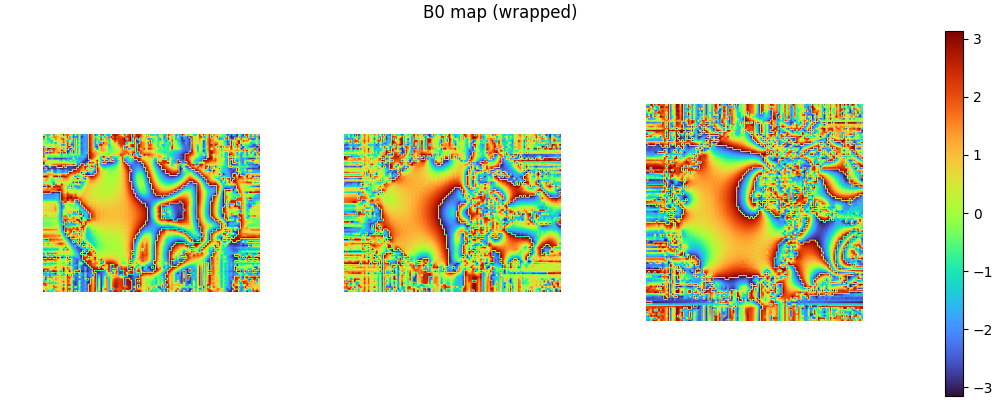

Unwrapping B0...


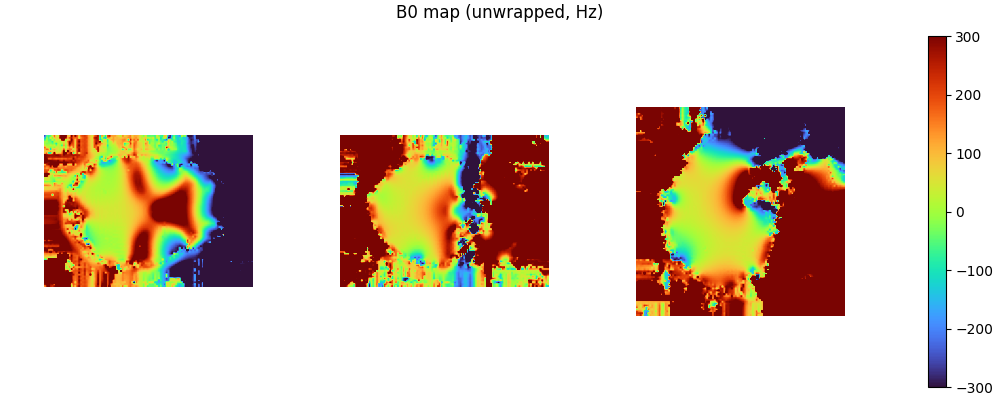

In [8]:
%matplotlib widget
from recotwix.sequences import recoB0
from pytools import plot

filename = '/DATA2/rawdata/twixtools_samples/meas_MID00575_FID29449_aa_B0Phantom.dat'
B0   = recoB0(filename)

plot.plot3D(B0.img_b0, cmap=['turbo'], title='B0 map (wrapped)')
plot.plot3D(B0.get_b0hz(), cmap=['turbo'], clim = [[-300, 300]], title='B0 map (unwrapped, Hz)')


Software version: VD/VE (!?)

Scan  0


  0%|          | 0.00/513M [00:00<?, ?B/s]

100%|██████████| 513M/513M [00:01<00:00, 269MB/s] 


Extracting kspace...
kspace original shape : torch.Size([1, 1, 1, 1, 1, 1, 1, 34, 1, 1, 48, 1, 1, 64, 32, 48]), scantype: image
kspace corrected shape: torch.Size([1, 1, 1, 1, 1, 1, 1, 34, 1, 1, 48, 1, 1, 64, 32, 64]), scantype: image
POCS reconstruction along dim = Col started...
kspace original shape : torch.Size([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 24, 1, 1, 24, 32, 64]), scantype: refscan
kspace corrected shape: torch.Size([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 48, 1, 1, 64, 32, 64]), scantype: refscan
Computing coil sensitivity...
Calibration region 32x24x24
Done.
Combining coils... 


k-space to image: 100%|██████████| 32/32 [00:02<00:00, 14.83it/s]


torch.Size([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 48, 1, 1, 64, 1, 64])
torch.Size([1, 1, 1, 1, 1, 1, 1, 34, 1, 1, 48, 1, 1, 64, 1, 64])
torch.Size([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 48, 1, 1, 64, 1, 64])


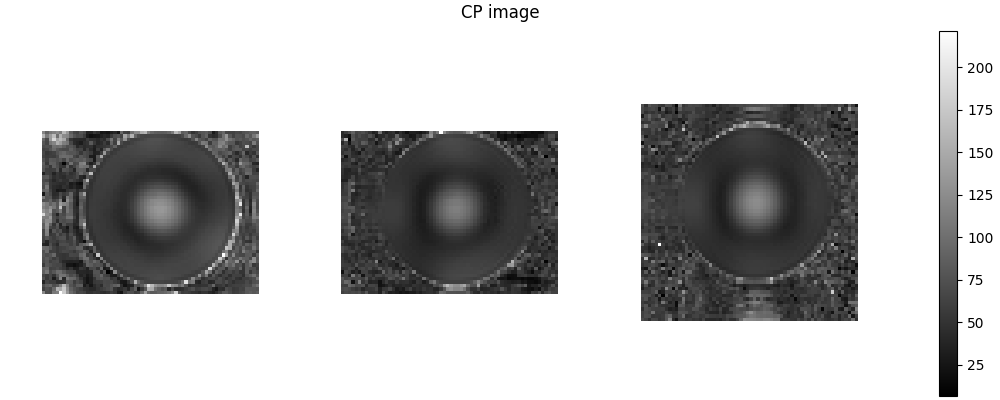

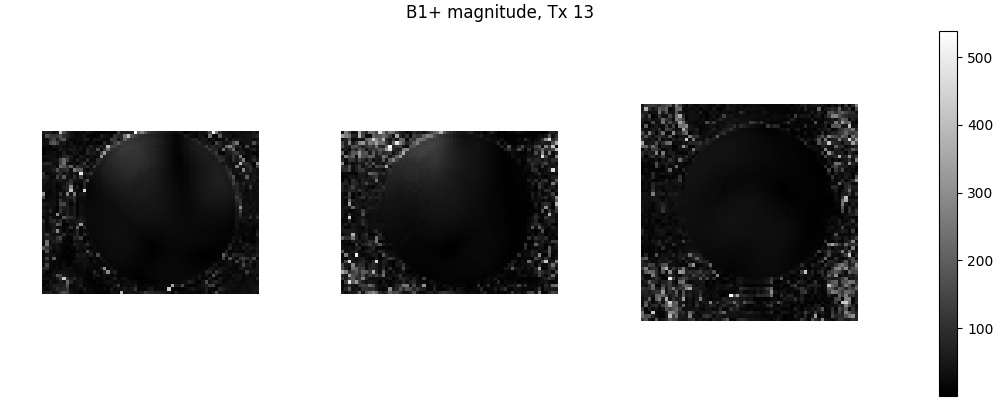

In [2]:
%matplotlib widget
from recotwix.sequences import recoB1TFLpTx
from pytools import plot
import torch

filename = '/DATA2/rawdata/twixtools_samples/meas_MID00866_FID61816_db_TFLb1_ICE_48Slc.dat'
twix = recoB1TFLpTx(filename)

print(twix.img_cp.shape)
print(twix.img.shape)
print(twix.img.abs().index_select(twix.dim_info['Rep']['ind'], torch.Tensor([0]).int()).shape)
plot.plot3D(twix.img_cp.abs(), title='CP image')
plot.plot3D(twix.img_fa.abs().index_select(twix.dim_info['Rep']['ind'], torch.Tensor([12]).int()), title='B1+ magnitude, Tx 13')
